In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from IPython.display import Audio 

In [2]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [3]:
# Dealing with warnings
import sys 
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

warnings.filterwarnings('ignore', category=DeprecationWarning)

### Preparing Data

In [4]:
import os
fileEmotion=[]
filePath=[]
fileNumber=[]
files=os.listdir("C:\\Users\\asus\\Speech Emotion Recognition\\CREMA-D")
for file in files:
    part=file.split("_")
    fileEmotion.append(part[2])
    fileNumber.append(part[0])
    filePath.append("C:\\Users\\asus\\Speech Emotion Recognition\\CREMA-D"+'\\'+file)



In [5]:
df=pd.DataFrame(fileEmotion, columns=['Emotions'])
df.replace(['ANG','DIS','FEA','HAP','NEU'],['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL'], inplace=True)
df.insert(0,'FileNumber',fileNumber)
df.insert(2,'FilePath',filePath)
df

,FileNumber,Emotions,FilePath
0,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
1,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
2,1001,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
3,1001,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
4,1001,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...
...,...,...,...
7437,1091,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
7438,1091,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
7439,1091,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
7440,1091,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...


In [6]:
df.to_csv("Crema-D Summary.csv", index=False)
df.head(10)

,FileNumber,Emotions,FilePath
0,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
1,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
2,1001,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
3,1001,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
4,1001,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...
5,1001,SAD,C:\Users\asus\Speech Emotion Recognition\CREMA...
6,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
7,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
8,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
9,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...


In [7]:
df=pd.read_csv("Crema-D Summary.csv")
df

,FileNumber,Emotions,FilePath
0,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
1,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
2,1001,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
3,1001,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
4,1001,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...
...,...,...,...
7437,1091,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
7438,1091,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
7439,1091,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
7440,1091,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...


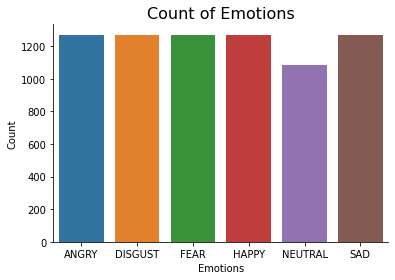

In [9]:
#Drawing a countplot
import seaborn as sns
sns.countplot(df.Emotions)
plt.xlabel('Emotions',size=10)
plt.ylabel('Count',size=10)
plt.title('Count of Emotions',size=16)
sns.despine()
plt.show()

### Wave-plot of audiofile

In [10]:
# Creating waveplot 
def createWave(data, sr, x):
    img=librosa.display.waveshow(data, sr=sr)
    plt.title('Waveplot for {} emotion'.format(x), size=16)
    plt.figure(figsize=(10,4))
    plt.show()

### Spectrogram of audiofile

In [11]:
# Creating spectogram
def createSpectrogram(data, sr, x):
    s=np.abs(librosa.stft(data))
    S=librosa.amplitude_to_db(s, ref=np.max)
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
    plt.title('Spectrogram for {} emotion'.format(x), size=16)
    plt.colorbar(format='%+2.f dB')
    plt.figure(figsize=(10,4))
    plt.show()

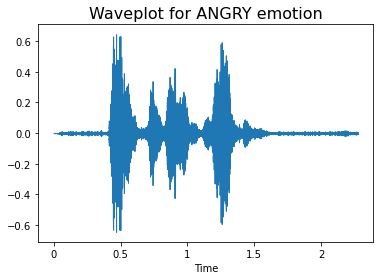

<Figure size 720x288 with 0 Axes>

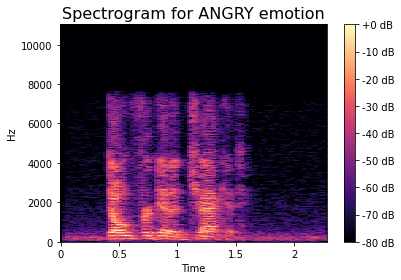

<Figure size 720x288 with 0 Axes>

In [12]:
# drawing waveplot and spectrogram for angry emotion

emotion='ANGRY'
path=df.FilePath[df.Emotions==emotion][0]
file, sr=librosa.load(path)
createWave(file, sr, emotion)
createSpectrogram(file, sr, emotion)
Audio(path)

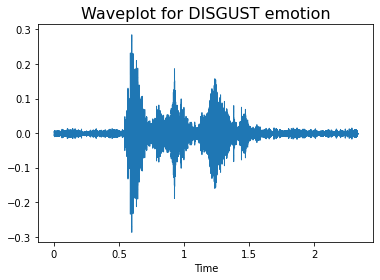

<Figure size 720x288 with 0 Axes>

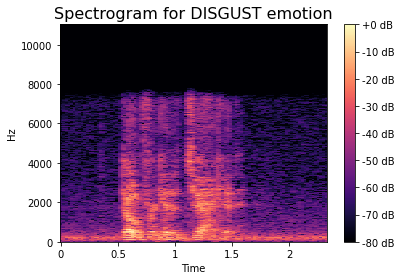

<Figure size 720x288 with 0 Axes>

In [13]:
# drawing waveplot and spectrogram for disgust emotion

emotion='DISGUST'
path1=df.FilePath[df.Emotions==emotion][1]
file, sr=librosa.load(path1)
createWave(file, sr, emotion)
createSpectrogram(file, sr, emotion)
Audio(path1)

### Data Augmentation

In [14]:
data, sr=librosa.load(path1)

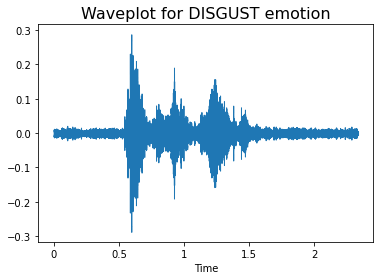

<Figure size 720x288 with 0 Axes>

In [15]:
# Adding noise

def add_noise(data):
    x=data.std()
    noise=np.random.normal(0, x, data.size)
    aug_data=data + noise*0.1
    return aug_data

noise_data=add_noise(data)
createWave(noise_data, sr, emotion)

In [16]:
import soundfile as sf

sf.write('added_noise.wav', noise_data, sr)
Audio('added_noise.wav')

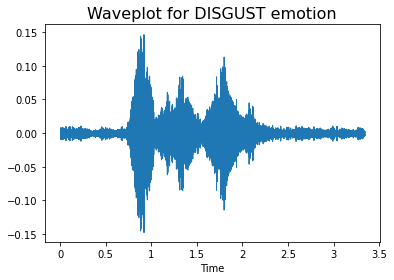

<Figure size 720x288 with 0 Axes>

In [17]:
# Time-Stretch

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.7)

stretch_data=stretch(data)

sf.write('stretch_time.wav', stretch_data, sr)
createWave(stretch_data, sr, emotion)
Audio('stretch_time.wav')

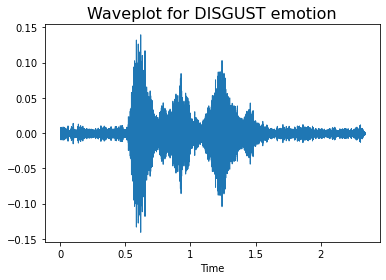

<Figure size 720x288 with 0 Axes>

In [18]:
# Pitch-Shift

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=0.7)

pitchShift_data=pitch(data)

sf.write('shift_pitch.wav', pitchShift_data, sr)
createWave(pitchShift_data, sr, emotion)
Audio('shift_pitch.wav')

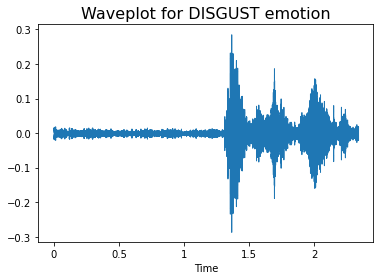

<Figure size 720x288 with 0 Axes>

In [19]:
# Shift Data

def shift(data):
    shiftRange=int(np.random.uniform(low=15, high=20)*1000)
    return np.roll(data, shiftRange)

shift_data=shift(data)

sf.write('shift_data.wav', shift_data, sr)
createWave(shift_data, sr, emotion)
Audio('shift_data.wav')

### Feature Extraction

In [20]:
# Extracting 3 important features i.e. mfcc, chroma, mel-spectrogram

def extractFeature(path, mfcc, chroma, mel):
    data, sr=sf.read(path, dtype='float32')
    
    res=np.array([])
    
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
        res=np.hstack((res, mfccs))
    
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
        res=np.hstack((res, chroma))
    
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(data, sr=sr).T, axis=0)
        res=np.hstack((res, mel))
    
    return res

In [21]:
x,y=[],[]

files=os.listdir("C:\\Users\\asus\\Speech Emotion Recognition\\CREMA-D")
for file in files:
    part=file.split("_")
    emotion=part[2]
    path="C:\\Users\\asus\\Speech Emotion Recognition\\CREMA-D"+'\\'+file
    features=extractFeature(path, mfcc=True, chroma=True, mel=True)
    x.append(features)
    y.append(emotion)
    

In [22]:
np.array(x)

array([[-3.06027405e+02,  9.26702347e+01,  8.49131203e+00, ...,
         2.87466776e-03,  3.21733882e-03,  2.53657531e-03],
       [-3.46399628e+02,  9.58391190e+01,  1.05162821e+01, ...,
         1.00346364e-03,  1.27373182e-03,  1.16716407e-03],
       [-3.21420258e+02,  9.47609100e+01,  8.15539742e+00, ...,
         1.33792115e-02,  1.02565568e-02,  8.36173445e-03],
       ...,
       [-3.70487915e+02,  9.06381073e+01,  3.89696960e+01, ...,
         3.73176089e-03,  6.23434689e-03,  6.94330595e-03],
       [-3.93181244e+02,  9.43532867e+01,  4.52518692e+01, ...,
         1.34759257e-03,  1.12457783e-03,  1.00039737e-03],
       [-4.28943237e+02,  9.59659042e+01,  4.75163155e+01, ...,
         5.89524745e-04,  1.01915968e-03,  1.42694882e-03]])

In [23]:
# Saving featues array in a file to save time 
file=open('Features', 'wb')
np.save(file, x)
file.close()

In [24]:
# Loding the features file
file=open('Features', 'rb')
features=np.load(file)
type(features)

numpy.ndarray

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=9)


In [26]:
x_train.shape, x_test.shape

((5581, 180), (1861, 180))

In [27]:
#Features extracted
x_train.shape[1]

180

### Initialising model

In [28]:
model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,),learning_rate='adaptive', max_iter=500)


In [29]:
# Training Model

model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [30]:
import joblib

joblib.dump(model, 'model.pkl')
clf=joblib.load('model.pkl')

In [31]:
#predicting using model
exp_y = y_test
pred_y = clf.predict(x_test)

In [32]:
cm=confusion_matrix(exp_y, pred_y)
cm

array([[204,  30,  41,  33,  22,   6],
       [ 22, 101,  40,   9,  74,  76],
       [ 29,  25, 119,  19,  30,  72],
       [ 58,  40,  67,  79,  62,  22],
       [  3,  31,  23,  11, 150,  64],
       [  1,  16,  36,   2,  35, 209]], dtype=int64)

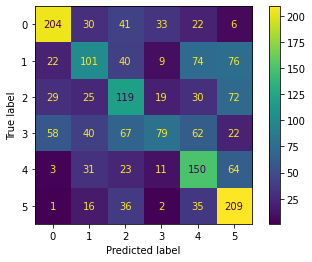

In [33]:
ConfusionMatrixDisplay(cm).plot()

In [34]:
print(classification_report(exp_y, pred_y))

              precision    recall  f1-score   support

         ANG       0.64      0.61      0.62       336
         DIS       0.42      0.31      0.36       322
         FEA       0.37      0.40      0.38       294
         HAP       0.52      0.24      0.33       328
         NEU       0.40      0.53      0.46       282
         SAD       0.47      0.70      0.56       299

    accuracy                           0.46      1861
   macro avg       0.47      0.47      0.45      1861
weighted avg       0.47      0.46      0.45      1861



In [35]:
accuracy_score(y_true=y_test, y_pred=pred_y)*100

46.31918323481999

In [36]:
model.score(x_test,y_test)

0.4631918323481999